# DSCI 100 - Group Project Report


### Title
**Classification of Work Recruitment using Grades Percentage**

### Introduction
Many students looking to enter the workforce experience anxiety regarding this process, and often resources such as competitive admission averages, and relevant extracurricular courses/degrees are scarce, not publicly accessible, or inaccurate. Our project aims to address this difficulty and provide a more reliable way to reach a concrete answer regarding job placement. Specifically, this project uses the Campus Recruitment dataset, which tracks candidates who apply and attempts to answer the question of whether an applicant will be placed or not based on their grade percentage.

### Methods

For this project, we will only use a certain variable for part of the data analysis, specifically the 10th grade percentage `ssc_p`, 12th grade `hsc_p`, degree percentage `degree_p`, test score percentage `etest_p`, mba grade percentage `mba_p`  and placement status `status`. We will not, however, filter the current data considering the row number is suitable for this data analysis which is 215. In the process of the project, we will also step up the total sample for “not placed” in the placement status, which will be using the “step_upsample” function from R.

We will use a scatterplot with the test score percentage at the x-axis versus mba grade percentage at the y-axis. Then, we will use the placement status as the color variable for the plot to get a better visualization. Adding layers of visualization with title and labeling will also be done to ensure an effective visualization.

### Results

In [1]:
library(tidyverse)
library(tidymodels)
data <- read_csv("Placement_Data_Full_Class.csv")
data

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NA
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NA
7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NA
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000
9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000


In [2]:
tidy_data <- rename(data,
               candidate_id = sl_no,
               gender = gender,
               sec_grade_percent = ssc_p,
               sec_edu_board = ssc_b,
               h_sec_grade_percent = hsc_p,
               h_sec_education_board = hsc_b,
               h_sec_specialization = hsc_s,
               degree_percent = degree_p,
               degree_type = degree_t,
               work_experience = workex,
               e_test_percent = etest_p,
               mba_specialization = specialisation,
               mba_percent = mba_p,
               placement_status = status,
               salary = salary) |>
        select(sec_grade_percent, h_sec_grade_percent, degree_percent, e_test_percent, mba_percent, placement_status) |>
        mutate(placement_status = as.factor(placement_status)) 

tidy_data

sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent,placement_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67.00,91.00,58.00,55.00,58.80,Placed
79.33,78.33,77.48,86.50,66.28,Placed
65.00,68.00,64.00,75.00,57.80,Placed
56.00,52.00,52.00,66.00,59.43,Not Placed
85.80,73.60,73.30,96.80,55.50,Placed
55.00,49.80,67.25,55.00,51.58,Not Placed
46.00,49.20,79.00,74.28,53.29,Not Placed
82.00,64.00,66.00,67.00,62.14,Placed
73.00,79.00,72.00,91.34,61.29,Placed


In [3]:
set.seed(2019)
tidy_split <- initial_split(tidy_data, prop = 0.75, strata = placement_status)
training_data <- training(tidy_split)
training_data
testing_data <- testing(tidy_split)

sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent,placement_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56.00,52.00,52.0,66.00,59.43,Not Placed
46.00,49.20,79.0,74.28,53.29,Not Placed
47.00,55.00,65.0,62.00,65.04,Not Placed
62.00,47.00,50.0,76.00,54.96,Not Placed
55.00,67.00,64.0,60.00,67.28,Not Placed
63.00,66.00,64.0,68.00,64.08,Not Placed
52.58,54.60,50.2,76.00,65.33,Not Placed
62.00,51.00,52.0,68.44,62.77,Not Placed
74.00,63.16,65.0,65.00,69.76,Not Placed


In [4]:
class_count <- training_data |>
               group_by(placement_status) |>
               summarize(
                   count = n()
               )
class_count

placement_status,count
<fct>,<int>
Not Placed,50
Placed,111


In [5]:
average_predictors <- training_data |>
                      group_by(placement_status) |>
                      summarize(across(sec_grade_percent : mba_percent, mean))
# without using the function "na.rm = TRUE", we can see that every columns have no missing values
average_predictors

placement_status,sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Not Placed,57.42040,58.20560,60.81760,70.63020,62.2432
Placed,71.94324,69.78486,68.95973,72.50937,62.3891


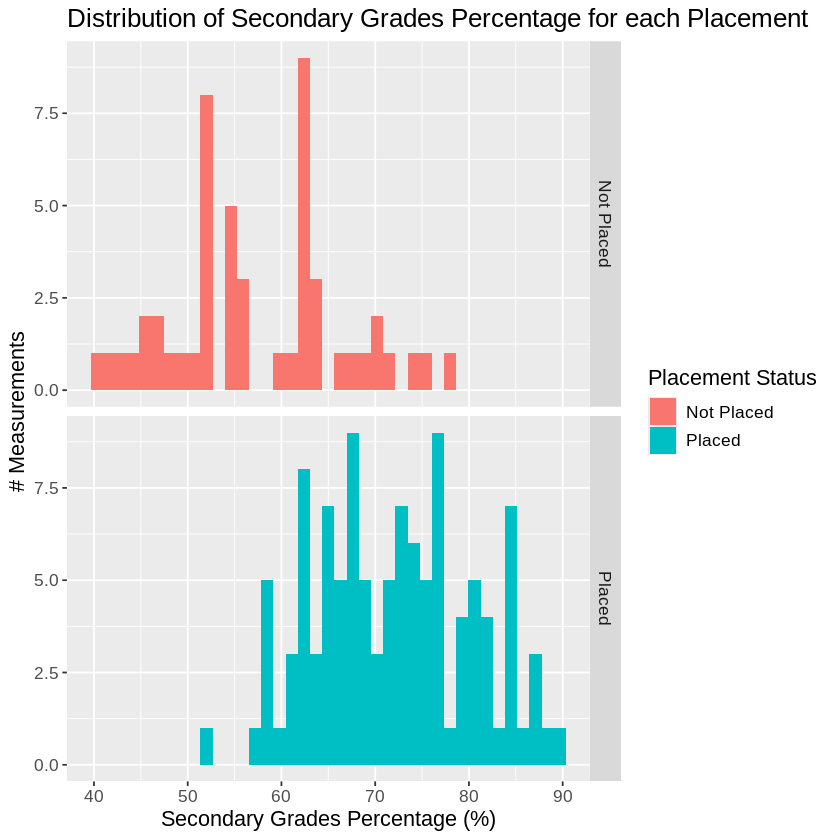

In [6]:
sec_grade_plot <- training_data |>
                   ggplot(aes(x = sec_grade_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1.3) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "Secondary Grades Percentage (%)",
                   y = "# Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 13)) +
                   ggtitle("Distribution of Secondary Grades Percentage for each Placement")
sec_grade_plot

Figure 3.1: Distribution of Secondary Grades Percentage for each Placement.

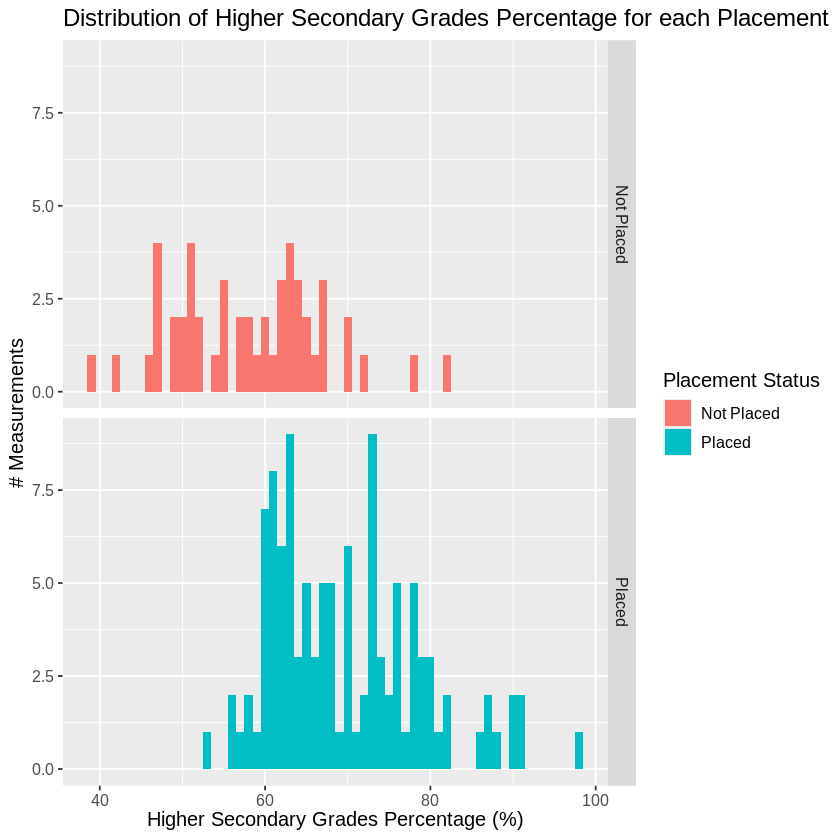

In [7]:
h_sec_plot <- training_data |>
                   ggplot(aes(x = h_sec_grade_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "Higher Secondary Grades Percentage (%)",
                   y = "# Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("Distribution of Higher Secondary Grades Percentage for each Placement")
h_sec_plot

Figure 3.2: Distribution of Higher Secondary Grades Percentage for each Placement.

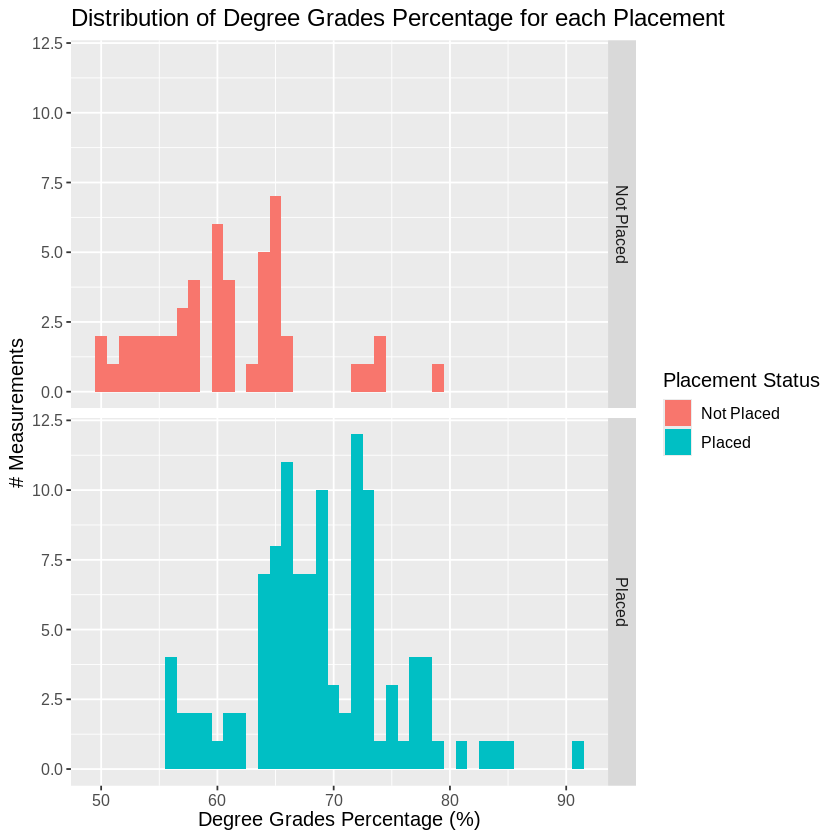

In [8]:
degree_plot <- training_data |>
                   ggplot(aes(x = degree_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "Degree Grades Percentage (%)",
                   y = "# Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("Distribution of Degree Grades Percentage for each Placement")
degree_plot

Figure 3.3: Distribution of Degree Grades Percentage for each Placement.

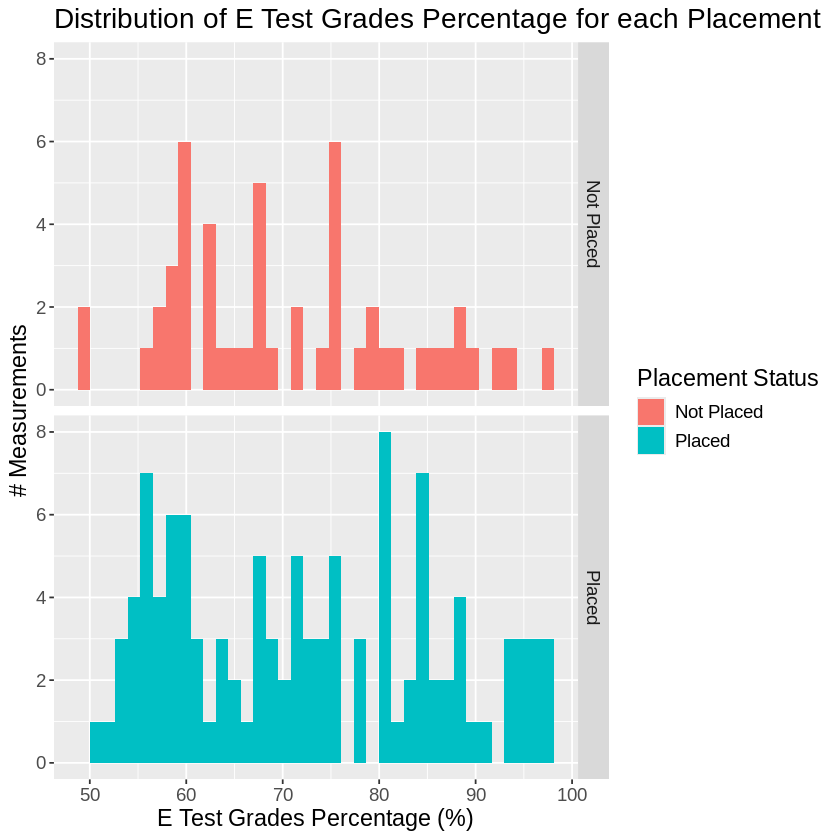

In [9]:
e_test_plot <- training_data |>
                   ggplot(aes(x = e_test_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1.3) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "E Test Grades Percentage (%)",
                   y = "# Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 14)) +
                   ggtitle("Distribution of E Test Grades Percentage for each Placement")
e_test_plot

Figure 3.4: Distribution of E Test Grades Percentage for each Placement.

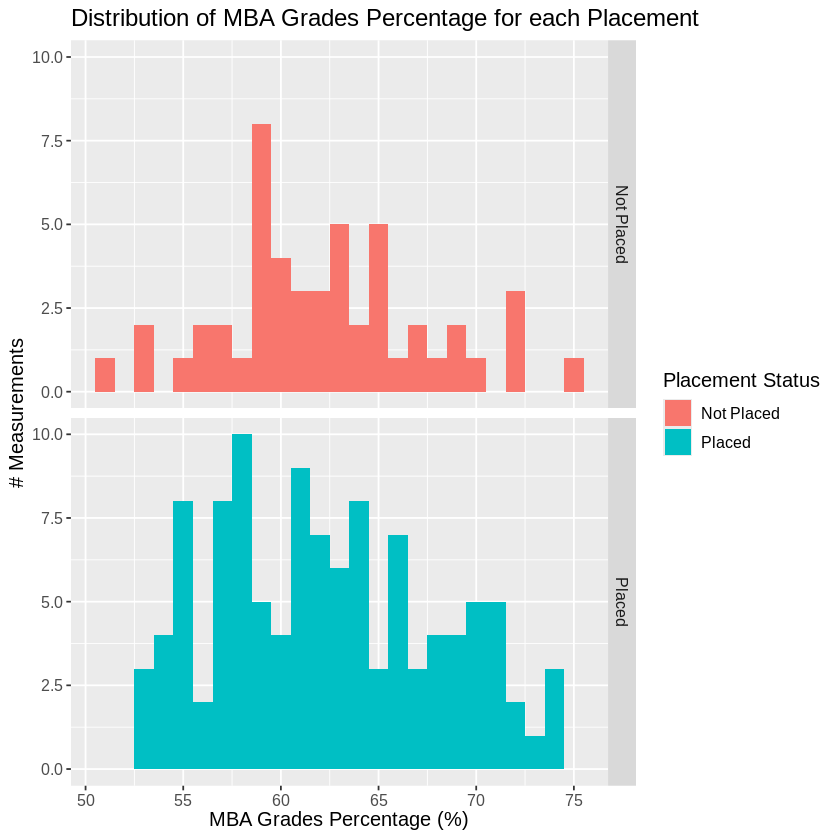

In [10]:
mba_plot <- training_data |>
                   ggplot(aes(x = mba_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "MBA Grades Percentage (%)",
                   y = "# Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("Distribution of MBA Grades Percentage for each Placement")
mba_plot

Figure 3.5: Distribution of MBA Grades Percentage for each Placement.

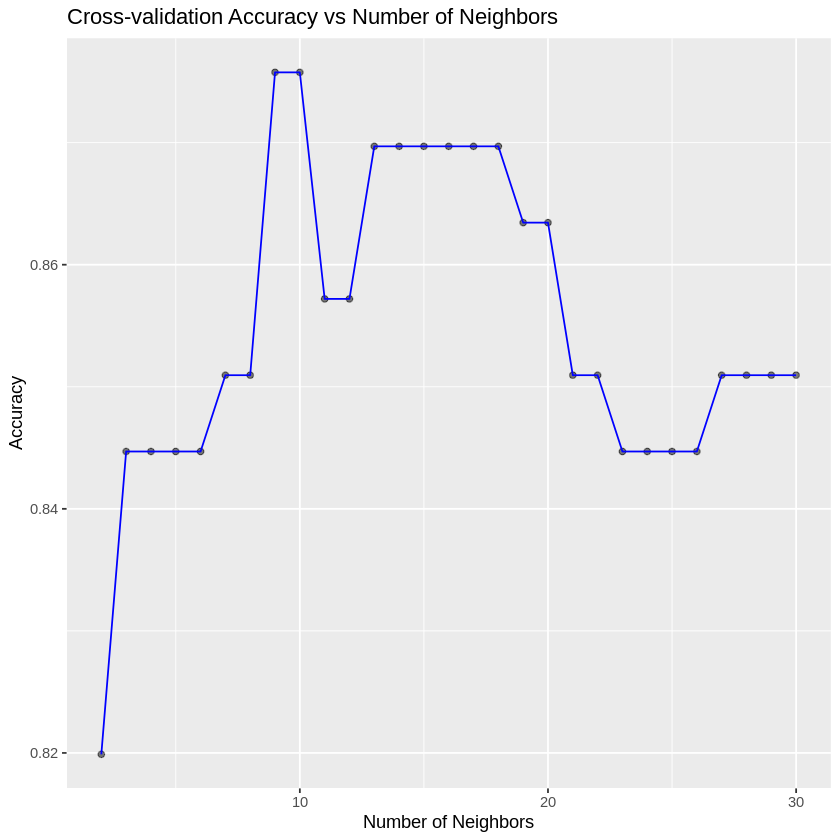

In [11]:
recipe <- recipe(placement_status ~ ., data = training_data) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

v_fold <- vfold_cv(training_data, v = 5, strata = placement_status)

knn_spec <- knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

k_values <- tibble(neighbors = seq(from = 2, to = 30, by = 1))

workflow <- workflow() |>
            add_recipe(recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = v_fold, grid = k_values) |>
            collect_metrics() |>
            filter(.metric == "accuracy")

cross_val_plot <- workflow |>
                  ggplot(aes(x = neighbors, y = mean)) +
                  geom_point(alpha = 0.5) +
                  geom_line(color = "blue") +
                  labs(x = "Number of Neighbors", y = "Accuracy") +
                  ggtitle("Cross-validation Accuracy vs Number of Neighbors")
cross_val_plot

Figure 3.5: Cross-validation Accuracy vs Number of Neighbors from 2-30.

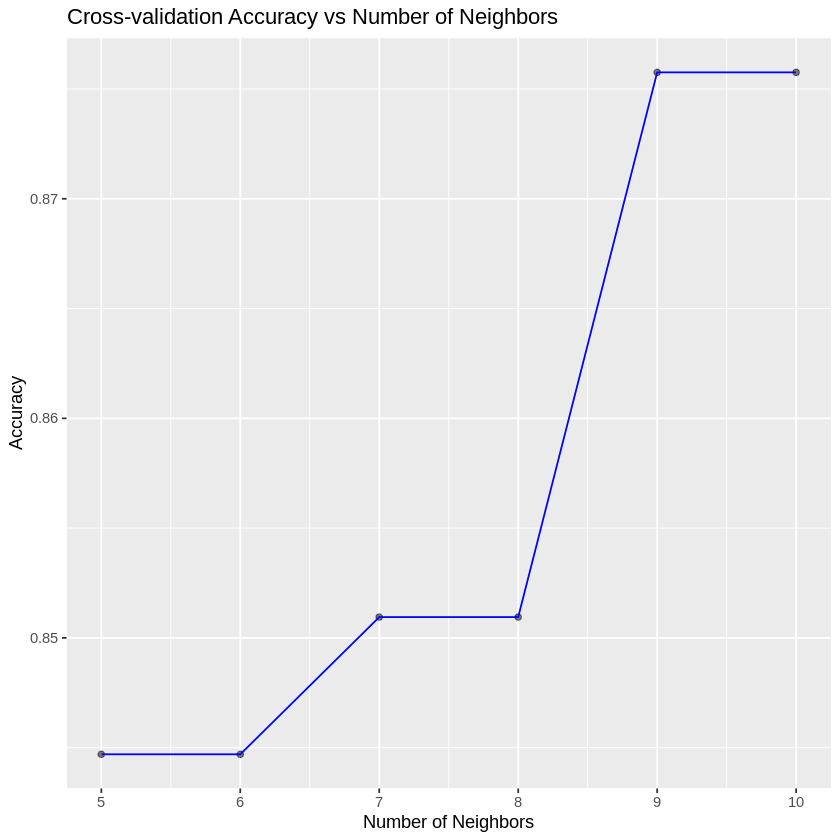

In [14]:
# minimize range of k
k_values_min <- tibble(neighbors = seq(from = 5, to = 10, by = 1))

workflow2 <- workflow() |>
             add_recipe(recipe) |>
             add_model(knn_spec) |>
             tune_grid(resamples = v_fold, grid = k_values_min) |>
             collect_metrics() |>
             filter(.metric == "accuracy")

cross_min_plot <- workflow2 |>
                  ggplot(aes(x = neighbors, y = mean)) +
                  geom_point(alpha = 0.5) +
                  geom_line(color = "blue") +
                  labs(x = "Number of Neighbors", y = "Accuracy") +
                  ggtitle("Cross-validation Accuracy vs Number of Neighbors")
cross_min_plot

Figure 3.6: Cross-validation Accuracy vs Number of Neighbors from 5-10.

From this plot, we have two K-values that are effective for predicting the most effective classification. However, we will choose the K-values as 9 because we are trying to avoid of facing things like having equal classified predictions of a new observation.

In [15]:
minim_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
              set_engine("kknn") |>
              set_mode("classification")

minim_fit <- workflow() |>
             add_recipe(recipe) |>
             add_model(minim_spec) |>
             fit(data = training_data)

minim_predictions <- minim_fit |>
                     predict(testing_data) |>
                     bind_cols(testing_data)

minim_metrics <- minim_predictions |>
                 metrics(truth = placement_status, estimate = .pred_class) |>
                 filter(.metric == "accuracy")
minim_metrics

minim_conf_mat <- minim_predictions |>
                  conf_mat(truth = placement_status, estimate = .pred_class) 
minim_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7777778


            Truth
Prediction   Not Placed Placed
  Not Placed          8      3
  Placed              9     34

### Discussion

#Precision = 8/(8+3) = 0.727272727272727
#Recall = 8/(8+9) = 0.470588235294118

### References


